## Yahoo Finace Libaray

[*********************100%***********************]  1 of 1 completed


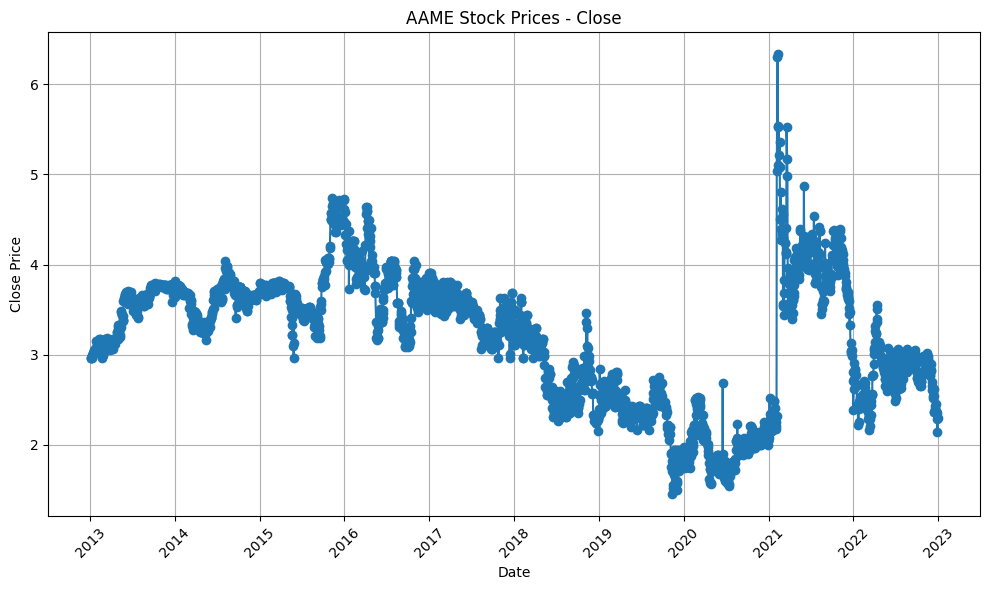

In [15]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the stock symbol and date range
stock_symbol = "AAME"
start_date = "2013-01-01"
end_date = "2023-01-01"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Flatten multi-level columns if present
if isinstance(stock_data.columns, pd.MultiIndex):
    stock_data.columns = [' '.join(col).strip() for col in stock_data.columns.values]

# Select and rename 'Close' or 'Adj Close' column without the stock symbol
if f"Adj Close {stock_symbol}" in stock_data.columns:
    stock_data = stock_data[[f"Adj Close {stock_symbol}"]].rename(columns={f"Adj Close {stock_symbol}": "Close"})
elif f"Close {stock_symbol}" in stock_data.columns:
    stock_data = stock_data[[f"Close {stock_symbol}"]].rename(columns={f"Close {stock_symbol}": "Close"})
else:
    print("Error: 'Close' data not found.")
    stock_data = None

# Proceed if 'Close' data is available
if stock_data is not None and not stock_data.empty:
    # Plot the close prices
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['Close'], marker='o', linestyle='-')
    plt.title(f'{stock_symbol} Stock Prices - Close')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()



## Plot historical data

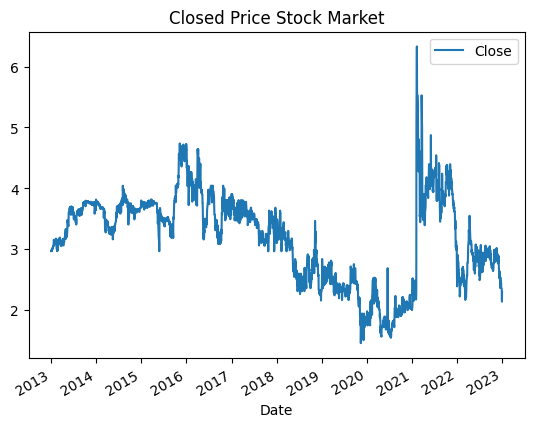

In [16]:
import matplotlib.pyplot as plt
stock_data[['Close']].plot()
plt.title("Closed Price Stock Market")
plt.show()

## Outlier checking

In [25]:
import yfinance as yf
import pandas as pd

# Define the stock symbol and date range
stock_symbol = "AAME"
start_date = "2013-01-01"
end_date = "2023-01-01"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Reset the index to make 'Date' a column
stock_data.reset_index(inplace=True)

# Flatten multi-level columns if present
if isinstance(stock_data.columns, pd.MultiIndex):
    stock_data.columns = [' '.join(col).strip() for col in stock_data.columns.values]

# Rename columns to remove any stock symbol suffix (e.g., 'Close AAME' to 'Close')
column_rename_map = {col: col.split()[0] for col in stock_data.columns}
stock_data.rename(columns=column_rename_map, inplace=True)

# Confirm that 'Date' is now a column and check structure
print(stock_data.head())


[*********************100%***********************]  1 of 1 completed

                       Date       Adj  Close  High   Low  Open  Volume
0 2013-01-02 00:00:00+00:00  2.967324   3.20  3.24  3.09  3.09    3500
1 2013-01-03 00:00:00+00:00  2.967324   3.20  3.32  3.09  3.19    5500
2 2013-01-04 00:00:00+00:00  2.967324   3.20  3.25  3.15  3.15    3000
3 2013-01-07 00:00:00+00:00  2.995142   3.23  3.23  3.05  3.20    4700
4 2013-01-08 00:00:00+00:00  2.967324   3.20  3.22  3.17  3.20    3800


In [26]:
import pandas as pd 

df = pd.DataFrame(stock_data)
# Convert the "Date" column to a datetime format
df['Date'] = pd.to_datetime(df['Date'])


In [27]:
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')

# Check the basic statistics of the column
print("Basic statistics for 'Open':")
print(df['Open'].describe())

Basic statistics for 'Open':
count    2518.000000
mean        3.334500
std         0.778982
min         1.480000
25%         2.680000
50%         3.510000
75%         3.940000
max         6.270000
Name: Open, dtype: float64


In [28]:
# Specify the column to analyze for outliers 
column_name = 'Open'

# Calculate the IQR (Interquartile Range)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and count outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
num_outliers = len(outliers)

# Display the number of outliers out of the total number of observations
print(f"Number of outliers in '{column_name}': {num_outliers} out of {len(df)} observations.")


Number of outliers in 'Open': 2 out of 2518 observations.


In [29]:
# Specify the column to analyze for outliers 
column_name = 'Close'

# Calculate the IQR (Interquartile Range)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and count outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
num_outliers = len(outliers)

# Display the number of outliers
print(f'Number of outliers in {column_name}: {num_outliers}')


Number of outliers in Close: 2


C:\Users\srb019\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\local_srb019\Temp\ipykernel_13624\2296304418.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column_name], orient='v', width=0.3, palette='Set1')


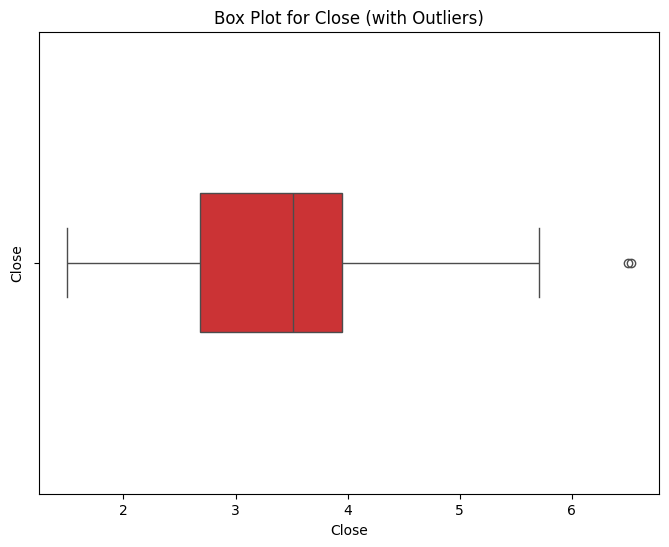

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


# Specify the column to visualize outliers 
column_name = 'Close'

# Create a box plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[column_name], orient='v', width=0.3, palette='Set1')
plt.title(f'Box Plot for {column_name} (with Outliers)')
plt.ylabel(column_name)
plt.show()


## Hyperparameters

In [32]:
# Define hyperparameters
feature_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
input_size = len(feature_columns)
hidden_size = 64
output_size = 1
num_layers = 2
num_attention_heads = 4
learning_rate = 0.001
num_epochs = 100
# Define the number of time steps to use as input features
num_time_steps = 10 

## LSTM

[*********************100%***********************]  1 of 1 completed


Epoch [1/100], Training Loss (LSTM): 0.7209
Epoch [1/100], Validation Loss (LSTM): 2.6154
Epoch [1/100], Test Loss (LSTM): 0.6601
Epoch [2/100], Training Loss (LSTM): 0.7159
Epoch [2/100], Validation Loss (LSTM): 2.6120
Epoch [2/100], Test Loss (LSTM): 0.6586
Epoch [3/100], Training Loss (LSTM): 0.7109
Epoch [3/100], Validation Loss (LSTM): 2.6084
Epoch [3/100], Test Loss (LSTM): 0.6572
Epoch [4/100], Training Loss (LSTM): 0.7059
Epoch [4/100], Validation Loss (LSTM): 2.6047
Epoch [4/100], Test Loss (LSTM): 0.6557
Epoch [5/100], Training Loss (LSTM): 0.7009
Epoch [5/100], Validation Loss (LSTM): 2.6006
Epoch [5/100], Test Loss (LSTM): 0.6542
Epoch [6/100], Training Loss (LSTM): 0.6959
Epoch [6/100], Validation Loss (LSTM): 2.5962
Epoch [6/100], Test Loss (LSTM): 0.6526
Epoch [7/100], Training Loss (LSTM): 0.6908
Epoch [7/100], Validation Loss (LSTM): 2.5915
Epoch [7/100], Test Loss (LSTM): 0.6510
Epoch [8/100], Training Loss (LSTM): 0.6856
Epoch [8/100], Validation Loss (LSTM): 2.5865


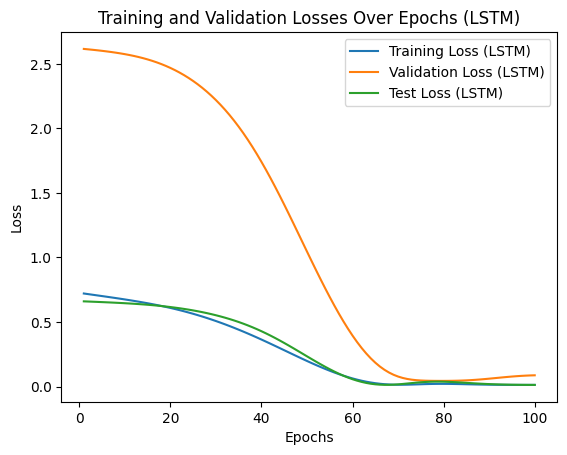

Validation Set Metrics (LSTM):
Mean Absolute Error (MAE): 0.2306
Mean Squared Error (MSE): 0.0872
Root Mean Squared Error (RMSE): 0.2953
Mean Absolute Percentage Error (MAPE): 14.9494

Test Set Metrics (LSTM):
Mean Absolute Error (MAE): 0.0870
Mean Squared Error (MSE): 0.0127
Root Mean Squared Error (RMSE): 0.1127
Mean Absolute Percentage Error (MAPE): 18.6849


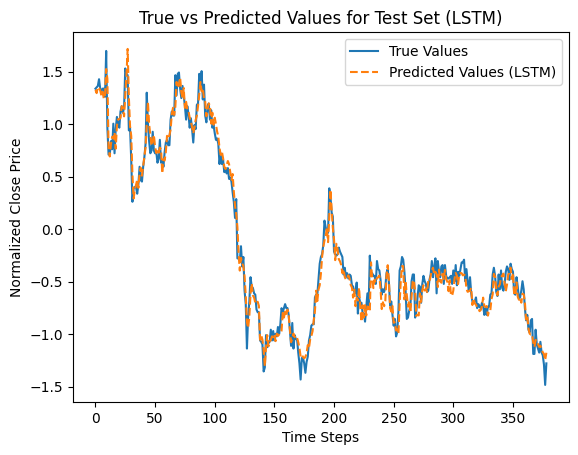

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import yfinance as yf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define the stock symbol and date range
stock_symbol = "AAME"
start_date = "2013-01-01"
end_date = "2023-01-01"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Reset index to make 'Date' a column again
stock_data.reset_index(inplace=True)

# Rename 'Adj Close' to 'Adjusted Close'
stock_data.rename(columns={'Adj Close': 'Adjusted Close'}, inplace=True)

# Use 'Date' as index
stock_data.set_index('Date', inplace=True)

# Normalize data
columns_to_normalize = ['Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close']
data_to_normalize = stock_data[columns_to_normalize].values

# Convert the data to PyTorch tensor
tensor_data = torch.tensor(data_to_normalize, dtype=torch.float32)

# Calculate mean and standard deviation for each column
mean = tensor_data.mean(dim=0)
std = tensor_data.std(dim=0)

# Normalize the data
normalized_data = (tensor_data - mean) / std

# Convert the normalized data back to a DataFrame
df_normalized = pd.DataFrame(normalized_data.numpy(), columns=columns_to_normalize)

# Add 'Date' column back to the DataFrame
df_normalized['Date'] = stock_data.index
data = df_normalized

# Define the percentage of data for training, validation, and testing
train_percent = 0.7
val_percent = 0.15
test_percent = 0.15

# Calculate the sizes of the train, validation, and test sets
train_size = int(train_percent * len(data))
val_size = int(val_percent * len(data))
test_size = len(data) - train_size - val_size

# Split the data into train, validation, and test sets
train_data = data.iloc[:train_size]
val_data = data.iloc[train_size:train_size + val_size]
test_data = data.iloc[train_size + val_size:]

# Define the features(inputs) and target columns
feature_columns = ['Low', 'Open', 'High']
target_column = 'Close'

# Extract features and target for each dataset
train_features = train_data[feature_columns].values
train_target = train_data[target_column].values

val_features = val_data[feature_columns].values
val_target = val_data[target_column].values

test_features = test_data[feature_columns].values
test_target = test_data[target_column].values

# Convert data to PyTorch tensors
train_features = torch.tensor(train_features, dtype=torch.float32)
train_target = torch.tensor(train_target, dtype=torch.float32)
val_features = torch.tensor(val_features, dtype=torch.float32)
val_target = torch.tensor(val_target, dtype=torch.float32)
test_features = torch.tensor(test_features, dtype=torch.float32)
test_target = torch.tensor(test_target, dtype=torch.float32)

# Define missing variables
input_size = len(feature_columns)  # Number of features
output_size = 1  # Predicting a single value (Close price)
learning_rate = 0.001  # Learning rate for optimizer
num_epochs = 100

# Define LSTM model class
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc_output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, (hn, cn) = self.lstm(x)  # Use both hidden state (hn) and cell state (cn)
        x = self.fc_output(hn[-1, :, :])
        return x

# Define hyperparameters for LSTM
hidden_size_lstm = 64
num_layers_lstm = 2

# Create the LSTM model instance
model_lstm = LSTMModel(input_size, hidden_size_lstm, output_size, num_layers_lstm)

# Define the loss function and optimizer for LSTM
criterion = nn.MSELoss()
optimizer_lstm = optim.Adam(model_lstm.parameters(), lr=learning_rate)

# Lists to store training, validation, and test losses for LSTM
train_losses_lstm = []
val_losses_lstm = []
test_losses_lstm = []

# Training loop for LSTM
for epoch in range(num_epochs):
    model_lstm.train()
    optimizer_lstm.zero_grad()

    # Forward pass for LSTM
    outputs_lstm = model_lstm(train_features.unsqueeze(1))
    
    # Calculate the loss for LSTM
    loss_lstm = criterion(outputs_lstm, train_target.unsqueeze(1))

    # Backpropagation and optimization for LSTM
    loss_lstm.backward()
    optimizer_lstm.step()

    # Store the training loss for LSTM
    train_losses_lstm.append(loss_lstm.item())

    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss (LSTM): {loss_lstm.item():.4f}')

    # Validation loss for LSTM
    model_lstm.eval()
    with torch.no_grad():
        val_outputs_lstm = model_lstm(val_features.unsqueeze(1))
        val_loss_lstm = criterion(val_outputs_lstm, val_target.unsqueeze(1))
    
    # Store the validation loss for LSTM
    val_losses_lstm.append(val_loss_lstm.item())

    print(f'Epoch [{epoch + 1}/{num_epochs}], Validation Loss (LSTM): {val_loss_lstm.item():.4f}')

    # Test loss for LSTM
    with torch.no_grad():
        test_outputs_lstm = model_lstm(test_features.unsqueeze(1))
        test_loss_lstm = criterion(test_outputs_lstm, test_target.unsqueeze(1))

    # Store the test loss for each epoch for LSTM
    test_losses_lstm.append(test_loss_lstm.item())

    print(f'Epoch [{epoch + 1}/{num_epochs}], Test Loss (LSTM): {test_loss_lstm.item():.4f}')

# Plotting the training, validation, and test losses for LSTM
plt.plot(range(1, num_epochs + 1), train_losses_lstm, label='Training Loss (LSTM)')
plt.plot(range(1, num_epochs + 1), val_losses_lstm, label='Validation Loss (LSTM)')
plt.plot(range(1, num_epochs + 1), test_losses_lstm, label='Test Loss (LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses Over Epochs (LSTM)')
plt.legend()
plt.show()

# Switch the LSTM model to evaluation mode
model_lstm.eval()

# Make predictions on the validation set using LSTM
with torch.no_grad():
    val_predictions_lstm = model_lstm(val_features.unsqueeze(1))

# Convert predictions and targets back to numpy arrays for LSTM
val_predictions_lstm = val_predictions_lstm.squeeze(1).numpy()

# Calculate evaluation metrics for validation set using LSTM
mae_val_lstm = mean_absolute_error(val_target.numpy(), val_predictions_lstm)
mse_val_lstm = mean_squared_error(val_target.numpy(), val_predictions_lstm)
rmse_val_lstm = np.sqrt(mse_val_lstm)
mape_val_lstm = calculate_mape(val_target.numpy(), val_predictions_lstm)

# Print the evaluation metrics for validation set using LSTM
print('Validation Set Metrics (LSTM):')
print(f'Mean Absolute Error (MAE): {mae_val_lstm:.4f}')
print(f'Mean Squared Error (MSE): {mse_val_lstm:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_val_lstm:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_val_lstm:.4f}')
print()

# Make predictions on the test set using LSTM
with torch.no_grad():
    test_predictions_lstm = model_lstm(test_features.unsqueeze(1))

# Convert predictions and targets back to numpy arrays for LSTM
test_predictions_lstm = test_predictions_lstm.squeeze(1).numpy()

# Calculate evaluation metrics for test set using LSTM
mae_test_lstm = mean_absolute_error(test_target.numpy(), test_predictions_lstm)
mse_test_lstm = mean_squared_error(test_target.numpy(), test_predictions_lstm)
rmse_test_lstm = np.sqrt(mse_test_lstm)
mape_test_lstm = calculate_mape(test_target.numpy(), test_predictions_lstm)

# Print the evaluation metrics for test set using LSTM
print('Test Set Metrics (LSTM):')
print(f'Mean Absolute Error (MAE): {mae_test_lstm:.4f}')
print(f'Mean Squared Error (MSE): {mse_test_lstm:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test_lstm:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_test_lstm:.4f}')

# Plotting the predicted values against true values for the test set using LSTM
plt.plot(test_target.numpy(), label='True Values')
plt.plot(test_predictions_lstm, label='Predicted Values (LSTM)', linestyle='dashed')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Close Price')
plt.title('True vs Predicted Values for Test Set (LSTM)')
plt.legend()
plt.show()





In [6]:
# Calculate R2
from sklearn.metrics import r2_score
r2 = r2_score(test_target, test_predictions_lstm)
print(f'R-squared: {r2}')

R-squared: 0.9821099106602251


## Prophet 

In [33]:

import yfinance as yf
stock_ticker = 'AAPL'
yfin = yf.Ticker(stock_ticker)
data = yfin.history(period="max")
data = data[['Close']]
data.reset_index(level=0, inplace=True)
data = data.rename({'Date': 'ds', 'Close': 'y'}, axis='columns')
print(data.tail())


data['ds'] = data['ds'].dt.tz_localize(None)
data



                             ds           y
11058 2024-10-24 00:00:00-04:00  230.570007
11059 2024-10-25 00:00:00-04:00  231.410004
11060 2024-10-28 00:00:00-04:00  233.399994
11061 2024-10-29 00:00:00-04:00  233.669998
11062 2024-10-30 00:00:00-04:00  230.100006


,ds,y
0,1980-12-12,0.098943
1,1980-12-15,0.093781
2,1980-12-16,0.086898
3,1980-12-17,0.089049
4,1980-12-18,0.091630
...,...,...
11058,2024-10-24,230.570007
11059,2024-10-25,231.410004
11060,2024-10-28,233.399994
11061,2024-10-29,233.669998


19:47:00 - cmdstanpy - INFO - Chain [1] start processing
19:47:03 - cmdstanpy - INFO - Chain [1] done processing


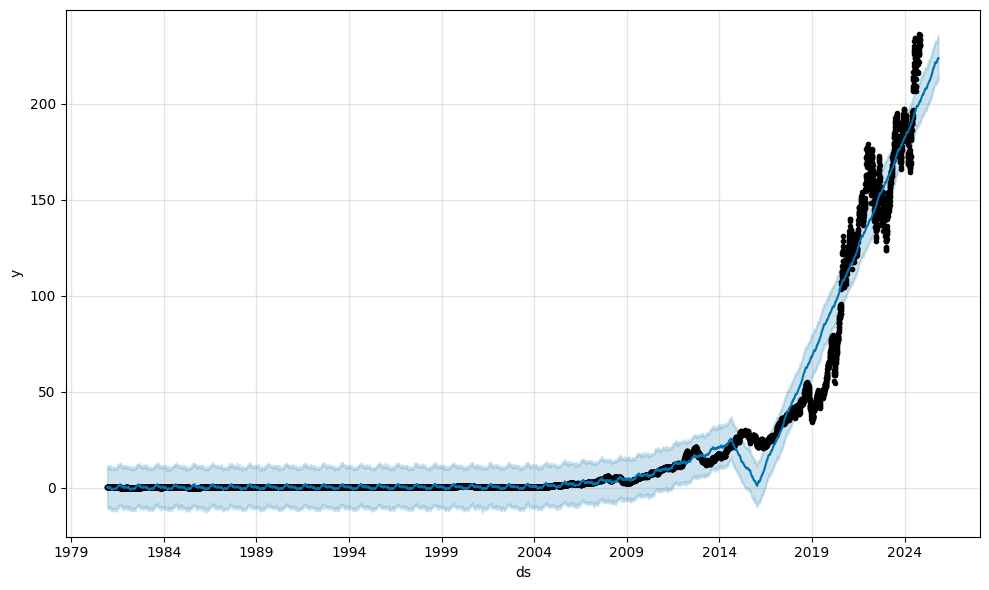

In [37]:
from prophet import Prophet

prophet_data = data.rename(columns={'ds': 'ds', 'y': 'y'})

# Create and fit the Prophet model
model = Prophet()
model.fit(prophet_data)

# Create a dataframe for future dates (1 year)
future = model.make_future_dataframe(periods=365)

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)


In [38]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

              ds        yhat  yhat_lower  yhat_upper
11423 2025-10-26  223.785504  213.192227  234.360007
11424 2025-10-27  223.833716  212.916202  234.548325
11425 2025-10-28  223.879334  213.040724  235.257758
11426 2025-10-29  223.929844  213.370045  234.280370
11427 2025-10-30  223.900381  213.551843  235.856191


## Transformer

[*********************100%***********************]  1 of 1 completed
C:\Users\srb019\AppData\Roaming\Python\Python312\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/100], Training Loss: 0.4592
Epoch [1/100], Validation Loss: 2.5734
Epoch [1/100], Test Loss: 4.6341
Epoch [2/100], Training Loss: 3.2250
Epoch [2/100], Validation Loss: 0.2299
Epoch [2/100], Test Loss: 1.2003
Epoch [3/100], Training Loss: 0.3743
Epoch [3/100], Validation Loss: 1.2898
Epoch [3/100], Test Loss: 0.3513
Epoch [4/100], Training Loss: 0.5819
Epoch [4/100], Validation Loss: 2.1980
Epoch [4/100], Test Loss: 0.4274
Epoch [5/100], Training Loss: 0.4788
Epoch [5/100], Validation Loss: 1.8489
Epoch [5/100], Test Loss: 0.3737
Epoch [6/100], Training Loss: 0.3705
Epoch [6/100], Validation Loss: 1.1113
Epoch [6/100], Test Loss: 0.1747
Epoch [7/100], Training Loss: 0.2691
Epoch [7/100], Validation Loss: 0.5574
Epoch [7/100], Test Loss: 0.0563
Epoch [8/100], Training Loss: 0.1720
Epoch [8/100], Validation Loss: 0.2949
Epoch [8/100], Test Loss: 0.1291
Epoch [9/100], Training Loss: 0.1231
Epoch [9/100], Validation Loss: 0.2305
Epoch [9/100], Test Loss: 0.3163
Epoch [10/100], Tra

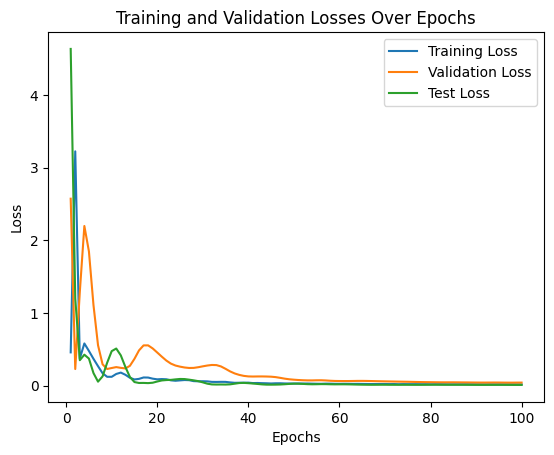

Final Test Loss: 0.0115

Validation Set Metrics:
Mean Absolute Error (MAE): 0.1238
Mean Squared Error (MSE): 0.0434
Root Mean Squared Error (RMSE): 0.2082
Mean Absolute Percentage Error (MAPE): 9.0579

Test Set Metrics:
Mean Absolute Error (MAE): 0.0797
Mean Squared Error (MSE): 0.0115
Root Mean Squared Error (RMSE): 0.1071
Mean Absolute Percentage Error (MAPE): 16.2391


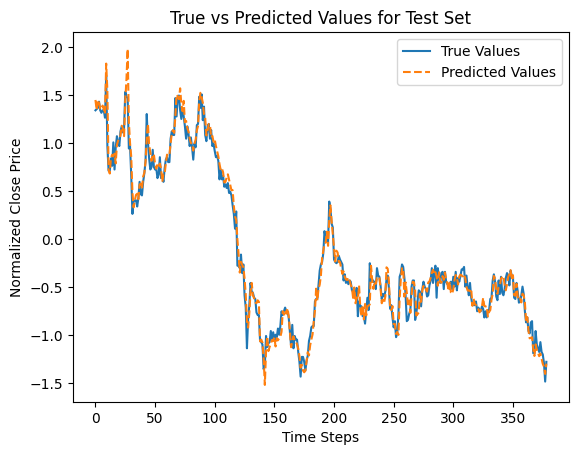

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import yfinance as yf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define the stock symbol and date range
stock_symbol = "AAME"
start_date = "2013-01-01"
end_date = "2023-01-01"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Reset index to make 'Date' a column again
stock_data.reset_index(inplace=True)

# Rename 'Adj Close' to 'Adjusted Close'
stock_data.rename(columns={'Adj Close': 'Adjusted Close'}, inplace=True)

# Use 'Date' as index
stock_data.set_index('Date', inplace=True)

# Normalize data
columns_to_normalize = ['Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close']
data_to_normalize = stock_data[columns_to_normalize].values

# Convert the data to PyTorch tensor
tensor_data = torch.tensor(data_to_normalize, dtype=torch.float32)

# Calculate mean and standard deviation for each column
mean = tensor_data.mean(dim=0)
std = tensor_data.std(dim=0)

# Normalize the data
normalized_data = (tensor_data - mean) / std

# Convert the normalized data back to a DataFrame
df_normalized = pd.DataFrame(normalized_data.numpy(), columns=columns_to_normalize)

# Add 'Date' column back to the DataFrame
df_normalized['Date'] = stock_data.index
data = df_normalized

# Define the percentage of data for training, validation, and testing
train_percent = 0.7
val_percent = 0.15
test_percent = 0.15

# Calculate the sizes of the train, validation, and test sets
train_size = int(train_percent * len(data))
val_size = int(val_percent * len(data))
test_size = len(data) - train_size - val_size

# Split the data into train, validation, and test sets
train_data = data.iloc[:train_size]
val_data = data.iloc[train_size:train_size + val_size]
test_data = data.iloc[train_size + val_size:]

# Define the features and target columns
feature_columns = ['Low', 'Open', 'High']
target_column = 'Close'

# Extract features and target for each dataset
train_features = train_data[feature_columns].values
train_target = train_data[target_column].values

val_features = val_data[feature_columns].values
val_target = val_data[target_column].values

test_features = test_data[feature_columns].values
test_target = test_data[target_column].values

# Convert data to PyTorch tensors
train_features = torch.tensor(train_features, dtype=torch.float32)
train_target = torch.tensor(train_target, dtype=torch.float32)
val_features = torch.tensor(val_features, dtype=torch.float32)
val_target = torch.tensor(val_target, dtype=torch.float32)
test_features = torch.tensor(test_features, dtype=torch.float32)
test_target = torch.tensor(test_target, dtype=torch.float32)

# Define a simple Transformer model
class TransformerModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, num_attention_heads):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_size, hidden_size)
        self.transformer = nn.Transformer(
            d_model=hidden_size,
            nhead=num_attention_heads,
            num_encoder_layers=num_layers,
            num_decoder_layers=num_layers
        )
        self.fc_output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(1, 0, 2)  # Adjust input shape for the transformer
        x = self.transformer(x, x)  # Set source and target as the same data
        x = x.permute(1, 0, 2)  # Restore the original shape
        x = self.fc_output(x[:, -1, :])  # Use the last layer's output for prediction
        return x

# Define hyperparameters
input_size = len(feature_columns)
hidden_size = 64
output_size = 1
num_layers = 2
num_attention_heads = 4
learning_rate = 0.001
num_epochs = 100

# Create the model instance
model = TransformerModel(input_size, hidden_size, output_size, num_layers, num_attention_heads)

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Lists to store training, validation, and test losses
train_losses = []
val_losses = []
test_losses = [] 

# Training loop
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = model(train_features.unsqueeze(1))
    
    # Calculate the loss
    loss = criterion(outputs, train_target.unsqueeze(1))

    # Backpropagation and optimization
    loss.backward()
    optimizer.step()

    # Store the training loss
    train_losses.append(loss.item())

    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {loss.item():.4f}')

    # Validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(val_features.unsqueeze(1))
        val_loss = criterion(val_outputs, val_target.unsqueeze(1))
    
    # Store the validation loss
    val_losses.append(val_loss.item())

    print(f'Epoch [{epoch + 1}/{num_epochs}], Validation Loss: {val_loss.item():.4f}')

    # Test loss
    with torch.no_grad():
        test_outputs = model(test_features.unsqueeze(1))
        test_loss = criterion(test_outputs, test_target.unsqueeze(1))

    # Store the test loss for each epoch
    test_losses.append(test_loss.item())

    print(f'Epoch [{epoch + 1}/{num_epochs}], Test Loss: {test_loss.item():.4f}')

# Plotting the training and validation losses
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses Over Epochs')
plt.legend()
plt.show()


# Print the test loss for the last epoch
print(f'Final Test Loss: {test_losses[-1]:.4f}')
print()

# Switch the model to evaluation mode
model.eval()

# Make predictions on the validation set
with torch.no_grad():
    val_predictions = model(val_features.unsqueeze(1))

# Convert predictions and targets back to numpy arrays
val_predictions = val_predictions.squeeze(1).numpy()
val_target_numpy = val_target.numpy()

# Calculate evaluation metrics for validation set
mae_val = mean_absolute_error(val_target_numpy, val_predictions)
mse_val = mean_squared_error(val_target_numpy, val_predictions)
rmse_val = np.sqrt(mse_val)
mape_val = calculate_mape(val_target_numpy, val_predictions)

# Print the evaluation metrics for validation set
print('Validation Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_val:.4f}')
print(f'Mean Squared Error (MSE): {mse_val:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_val:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_val:.4f}')
print()

# Make predictions on the test set
with torch.no_grad():
    test_predictions = model(test_features.unsqueeze(1))

# Convert predictions and targets back to numpy arrays
test_predictions = test_predictions.squeeze(1).numpy()
test_target_numpy = test_target.numpy()

# Calculate evaluation metrics for test set
mae_test = mean_absolute_error(test_target_numpy, test_predictions)
mse_test = mean_squared_error(test_target_numpy, test_predictions)
rmse_test = np.sqrt(mse_test)
mape_test = calculate_mape(test_target_numpy, test_predictions)

# Print the evaluation metrics for test set
print('Test Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_test:.4f}')
print(f'Mean Squared Error (MSE): {mse_test:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_test:.4f}')

# Plotting the predicted values against true values for the test set
plt.plot(test_target_numpy, label='True Values')
plt.plot(test_predictions, label='Predicted Values', linestyle='dashed')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Close Price')
plt.title('True vs Predicted Values for Test Set')
plt.legend()
plt.show()


In [8]:
# calculate R2
from sklearn.metrics import r2_score
r2 = r2_score(test_target_numpy, test_predictions)
print(f'R-squared: {r2}')

R-squared: 0.9768611481149041
